In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [16]:
df = pd.read_excel('4.xlsx')

In [17]:
df_features = df.drop(['Tanggal', 'Perubahan'], axis=1)
df_target = df['Perubahan']

In [18]:
cols = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol']
df_features[cols] = df_features[cols].astype('category')

df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Terakhir   32 non-null     category
 1   Pembukaan  32 non-null     category
 2   Tertinggi  32 non-null     category
 3   Terendah   32 non-null     category
 4   Vol        32 non-null     category
dtypes: category(5)
memory usage: 6.8 KB


In [19]:
for col in cols:
    df_features[col] = df_features[col].cat.codes
df_features.head(32)

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol
0,13,13,19,18,15
1,0,14,9,0,30
2,16,0,10,1,24
3,15,17,15,10,18
4,18,16,26,31,16
5,7,19,13,12,13
6,24,7,17,16,10
7,26,25,20,24,8
8,31,27,22,26,2
9,23,28,28,27,3


In [20]:
scale = StandardScaler().fit(df_features).transform(df_features.astype(float))
# scale = StandardScaler().fit_transform(df_features)
cols = list(df_features.columns)

df_features_scale = pd.DataFrame(scale, columns=cols)
df_features_scale.head()

,Terakhir,Pembukaan,Tertinggi,Terendah,Vol
0,-0.270765,-0.270765,0.379071,0.270765,-0.054153
1,-1.678744,-0.162459,-0.703989,-1.678744,1.570438
2,0.054153,-1.678744,-0.595683,-1.570438,0.920602
3,-0.054153,0.162459,-0.054153,-0.595683,0.270765
4,0.270765,0.054153,1.137214,1.678744,0.054153


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_features_scale, df_target, test_size=0.33, random_state=10)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (21, 5) (21,)
Test set: (11, 5) (11,)


In [22]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
print("Before undersampling: ", Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", Counter(y_train_under))

Before undersampling:  Counter({'Turun': 11, 'Naik': 10})
After undersampling:  Counter({'Naik': 10, 'Turun': 10})


In [23]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0,1))
X_scaled = sc.fit_transform(df_features)

In [24]:
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [25]:
y_pred = dt.predict(X_test) 
y_pred[0:5]

array(['Naik', 'Turun', 'Turun', 'Naik', 'Naik'], dtype=object)

In [26]:
y_test[0:5]

20     Naik
7      Naik
5     Turun
2      Naik
3     Turun
Name: Perubahan, dtype: object

In [27]:
print('Akurasi Train set: ', accuracy_score(y_train, dt.predict(X_train)))
print('Akurasi Test set: ', accuracy_score(y_test, y_pred))

Akurasi Train set:  1.0
Akurasi Test set:  0.6363636363636364


In [28]:
dt.score(X_test, y_test)

0.6363636363636364

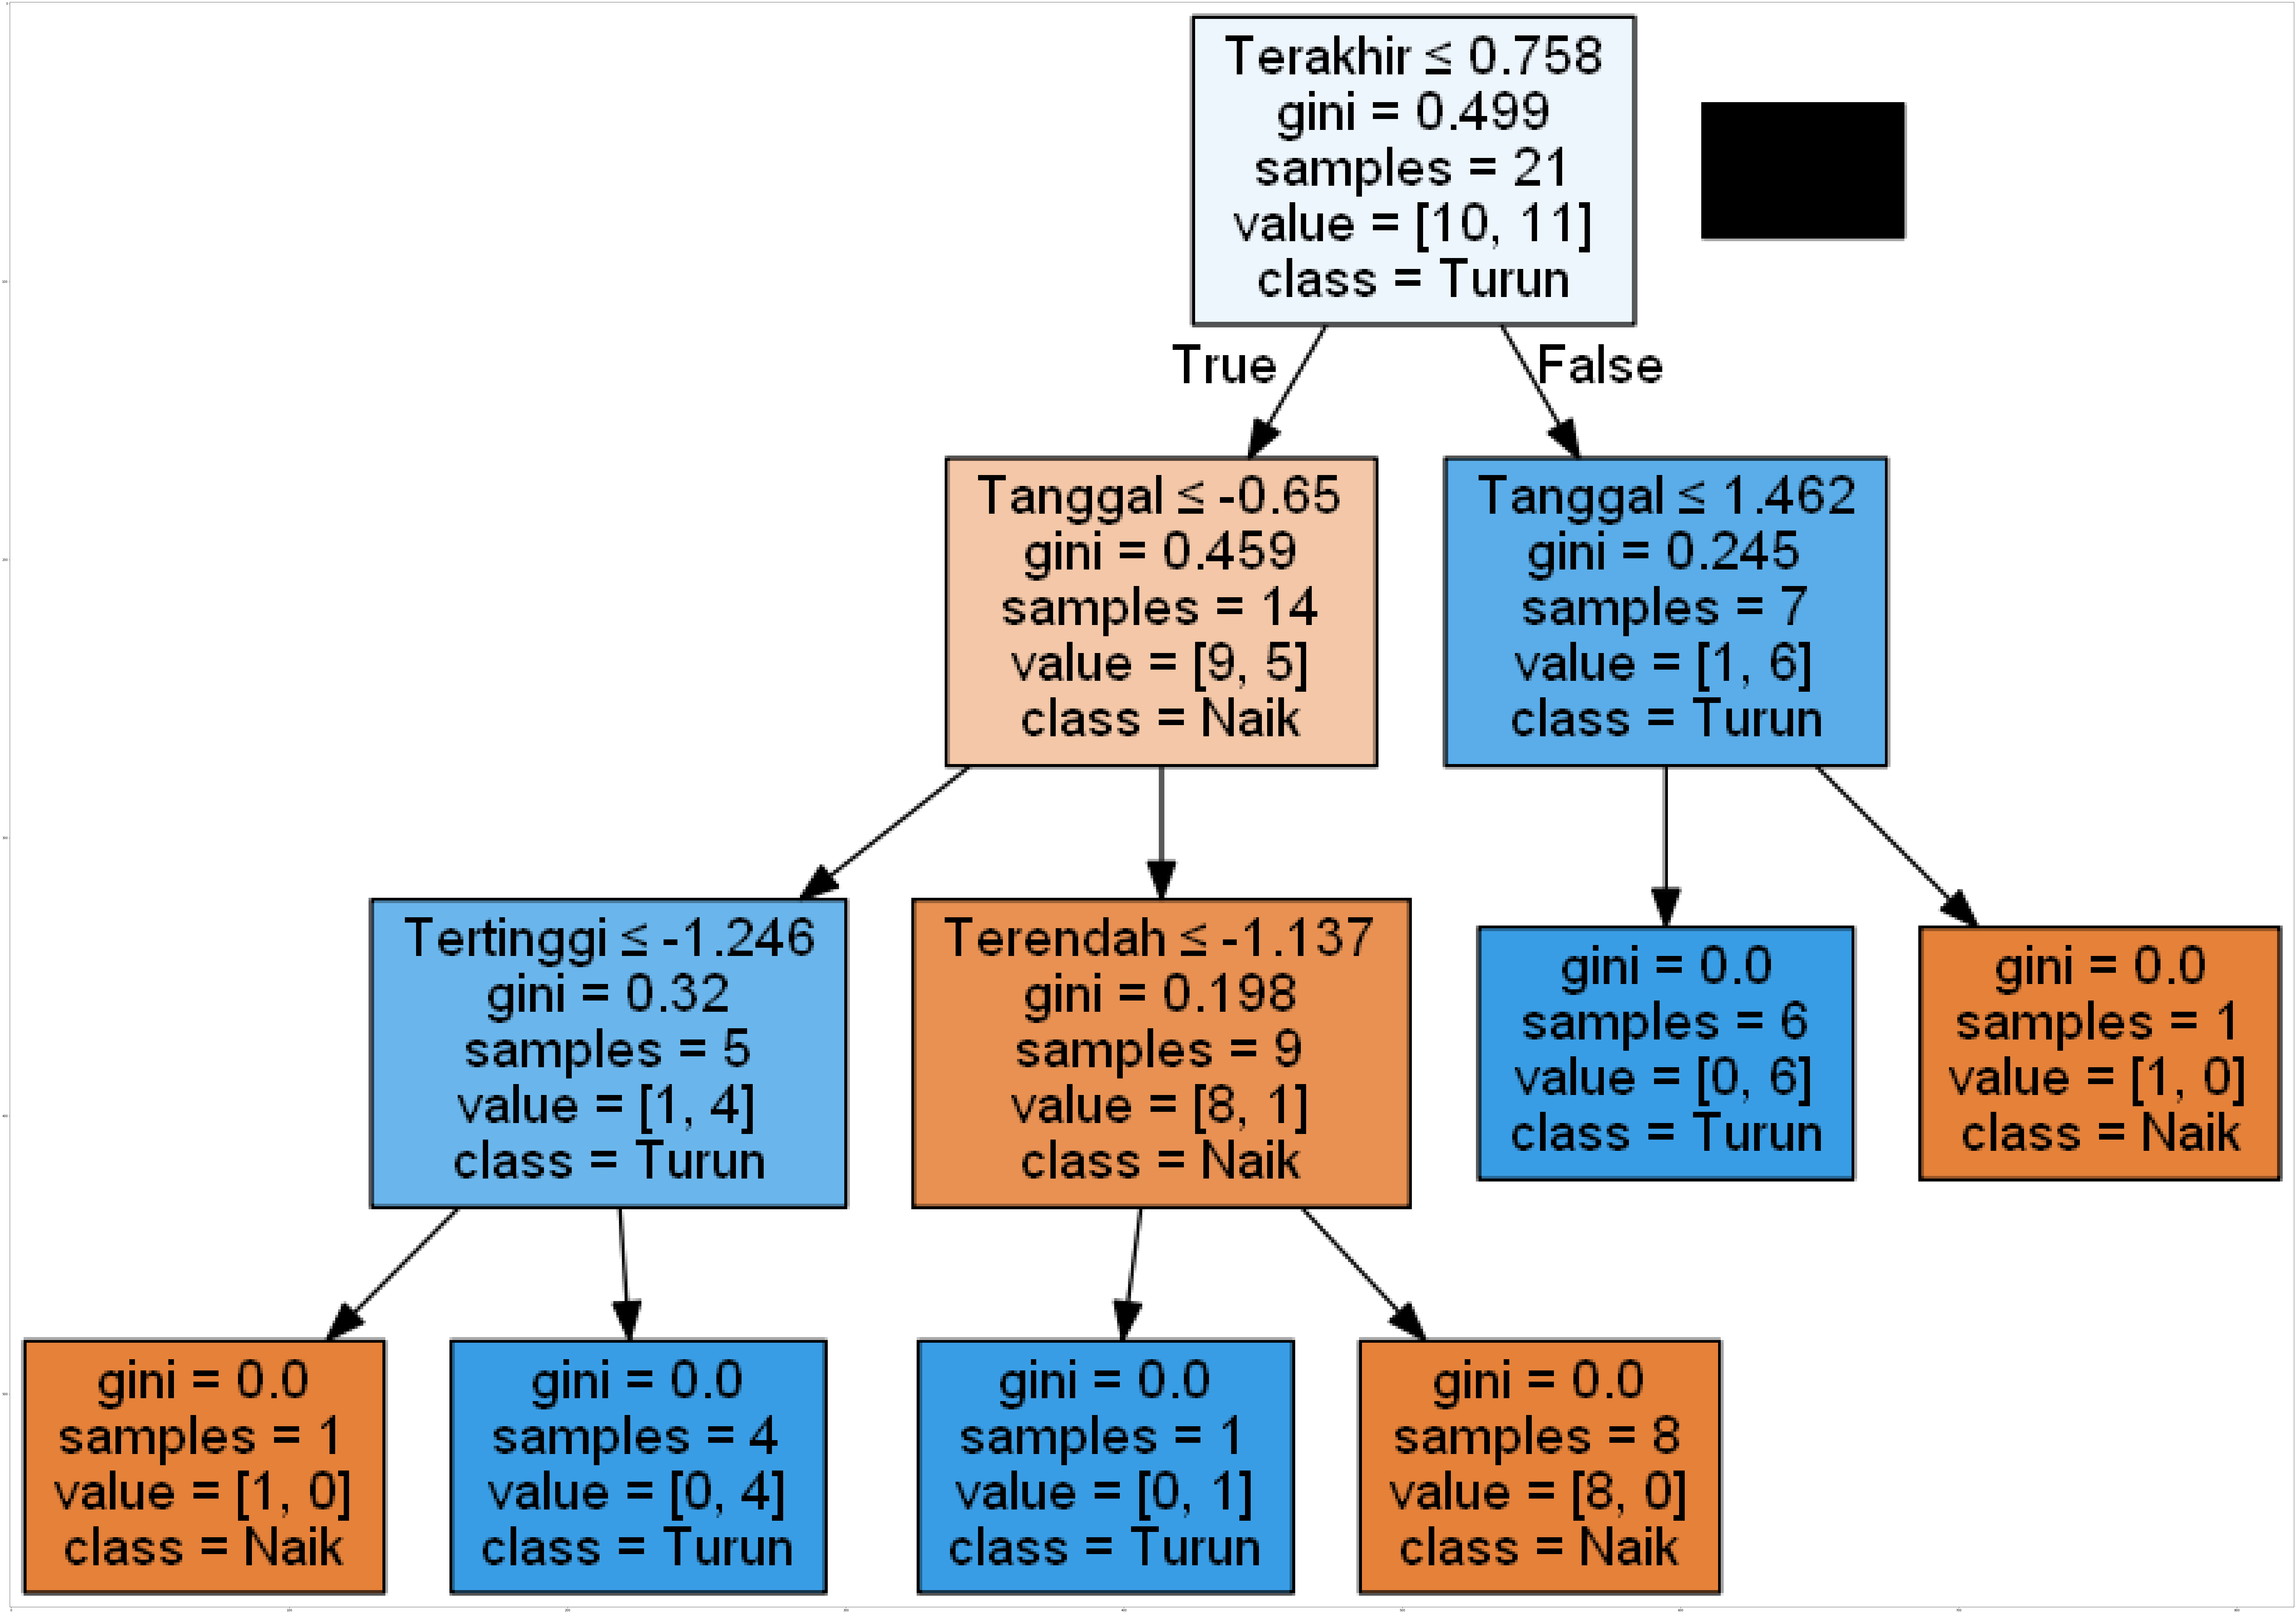

In [29]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree\

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"


%matplotlib inline

dot_data = StringIO()
filename = 'teuing_tree.png'
featuresNames = df.columns[0:5]
targetNames = df['Perubahan'].unique().tolist()

out = tree.export_graphviz(dt, feature_names=featuresNames, out_file=dot_data, class_names=np.unique(y_train), 
                           filled=True, special_characters=True, rotate=False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)

img = mpimg.imread(filename)
plt.figure(figsize=(200, 100))
plt.imshow(img, interpolation='nearest')